# Day 08. Exercise 05
# Clustering

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')
df

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,-64.400000
1,user_10,20,89.0,-74.800000
2,user_14,61,143.0,-159.000000
3,user_17,51,47.0,-61.600000
4,user_18,5,3.0,-5.666667
5,user_19,118,16.0,-98.750000
6,user_21,65,10.0,-95.500000
7,user_25,79,179.0,-92.600000
8,user_28,60,149.0,-86.400000
9,user_3,18,317.0,-105.400000


In [3]:
df=df.drop(columns=['pageviews'])
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
X=df.drop(columns=['uid'])
X

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


In [5]:
kmeans = KMeans(random_state=21, n_clusters=3)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,21
,copy_x,True
,algorithm,'lloyd'


In [6]:
kmeans.labels_

array([0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1], dtype=int32)

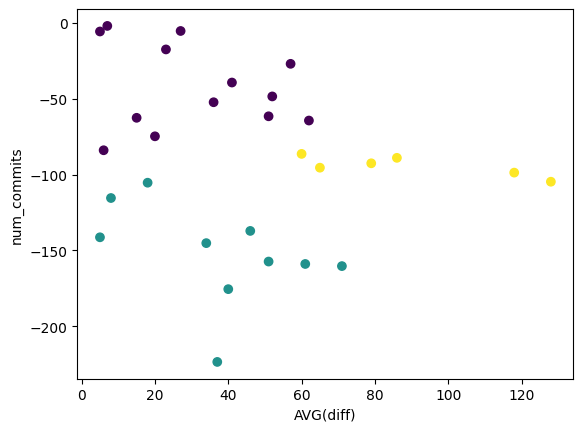

In [7]:
plt.scatter(df['num_commits'],df['AVG(diff)'],c=kmeans.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

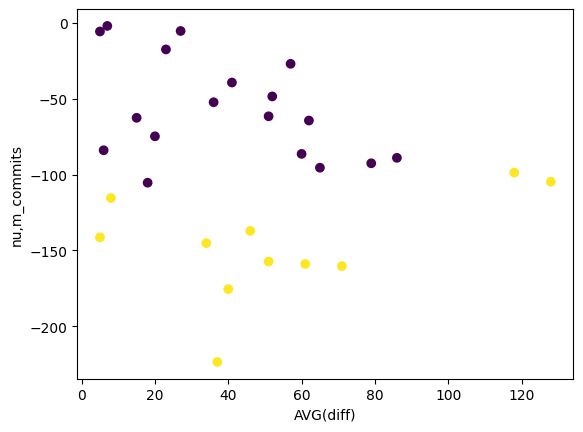

In [8]:
t_kmeans = KMeans(random_state=21, n_clusters=2)
t_kmeans.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_kmeans.labels_)
plt.ylabel('nu,m_commits')
plt.xlabel('AVG(diff)')
plt.show()

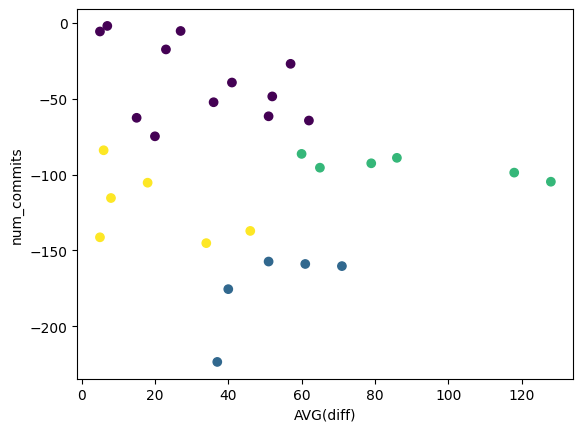

In [9]:
t_kmeans = KMeans(random_state=21, n_clusters=4)
t_kmeans.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_kmeans.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

In [10]:
silhouette_score(X, kmeans.labels_)

0.4454402135233297

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [11]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(X)

,eps,20
,min_samples,2
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


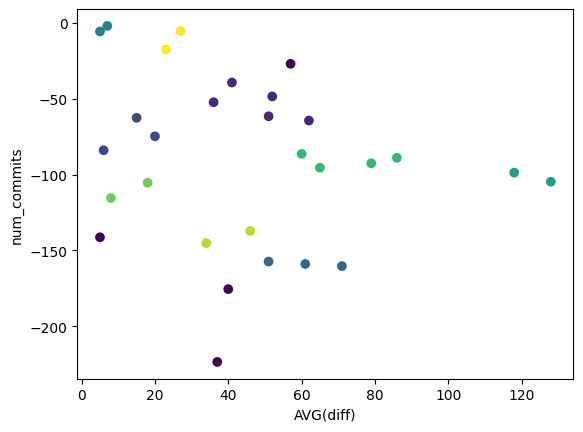

In [12]:
plt.scatter(df['num_commits'],df['AVG(diff)'],c=dbscan.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

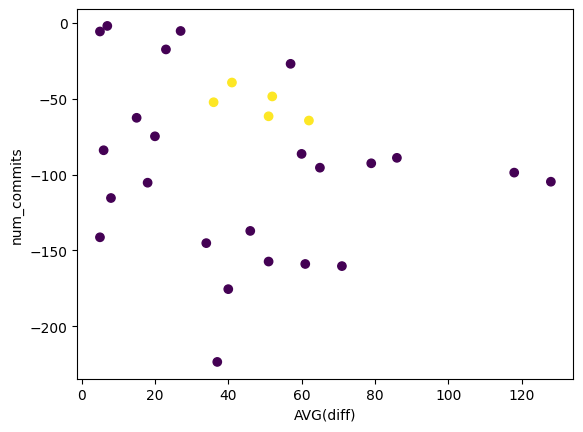

In [13]:
t_dbscan = DBSCAN(eps=20, min_samples=5)
t_dbscan.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_dbscan.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

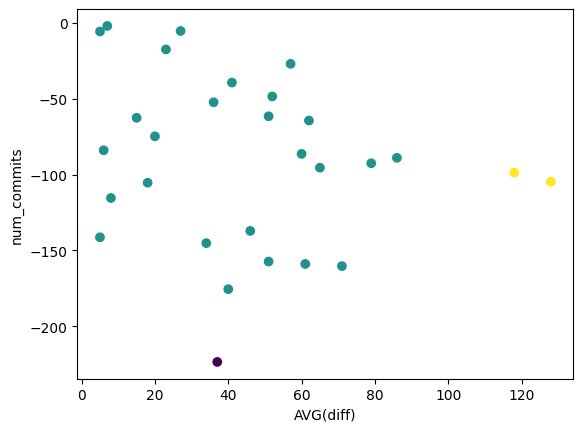

In [14]:
t_dbscan = DBSCAN(eps=30, min_samples=2)
t_dbscan.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_dbscan.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

In [15]:
silhouette_score(X, dbscan.labels_)

0.38339641455696616

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [16]:
agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative.fit(X)

,n_clusters,5
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


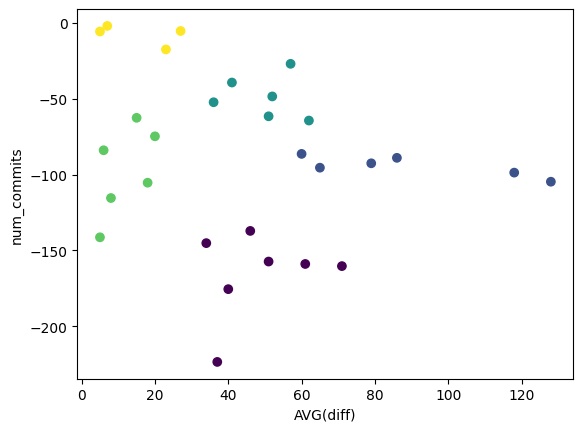

In [17]:
plt.scatter(df['num_commits'],df['AVG(diff)'],c=agglomerative.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

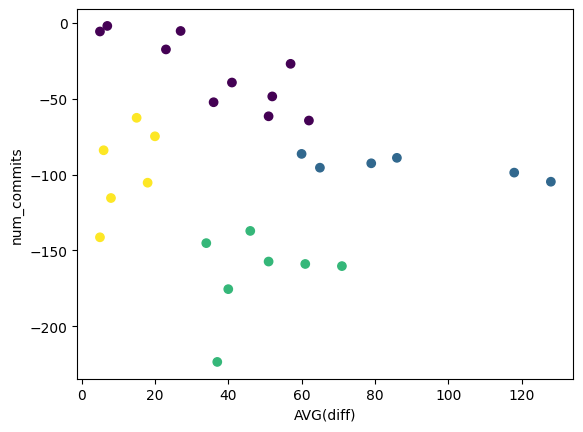

In [18]:
t_agglomerative = AgglomerativeClustering(n_clusters=4)
t_agglomerative.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_agglomerative.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

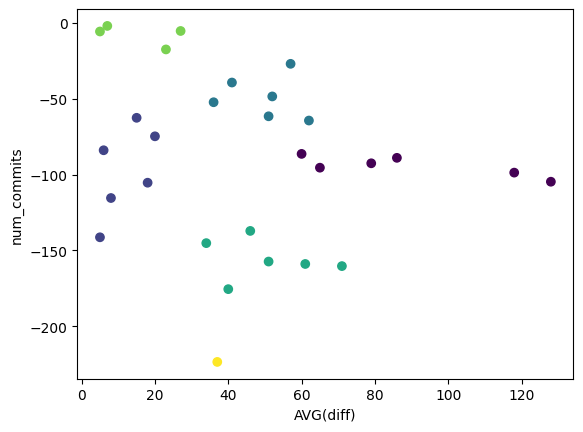

In [19]:
t_agglomerative = AgglomerativeClustering(n_clusters=6)
t_agglomerative.fit(X)
plt.scatter(df['num_commits'],df['AVG(diff)'],c=t_agglomerative.labels_)
plt.ylabel('num_commits')
plt.xlabel('AVG(diff)')
plt.show()

In [20]:
silhouette_score(X, agglomerative.labels_)

0.46383015199381467

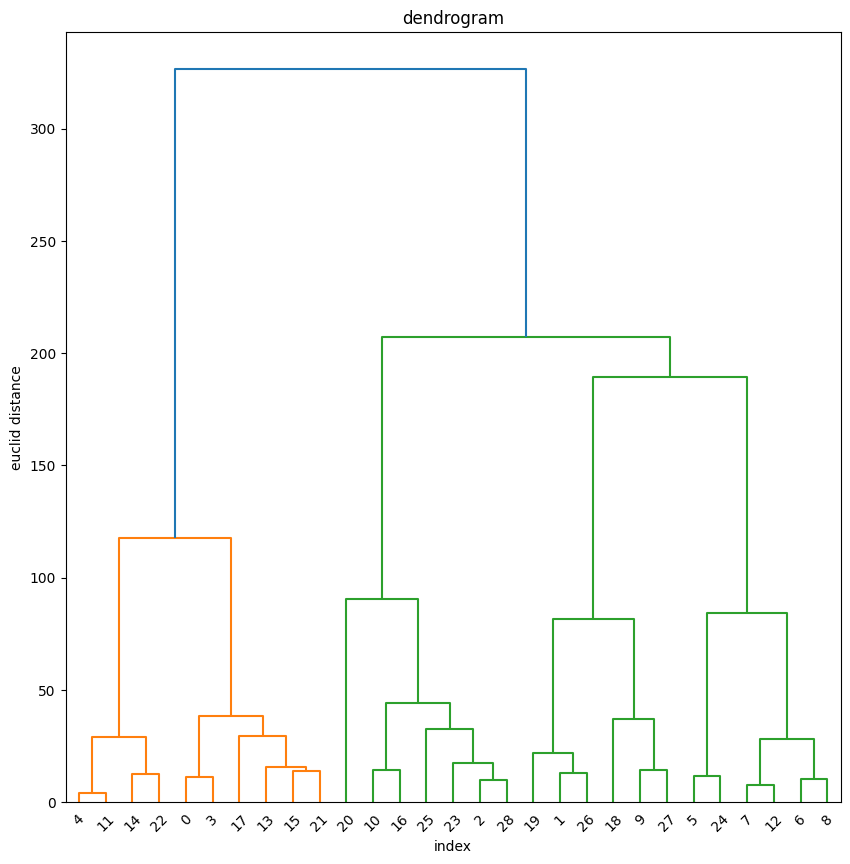

In [21]:
dendrogram_ = linkage(X, method='ward')
plt.figure(figsize=(10, 10))
dendrogram(dendrogram_)
plt.title('dendrogram')
plt.xlabel('index')
plt.ylabel('euclid distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [22]:
def show_best_params(model_class_clustering, params, name_param, distance):
	result_score = -1
	results = []
	labels = []
	best_val=distance[0]
	for val in distance:
		params[name_param]=val
		model = model_class_clustering(**params)
		model.fit(X)
		results.append(silhouette_score(X, model.labels_))
		if silhouette_score(X, model.labels_)>result_score:
			result_score=silhouette_score(X, model.labels_)
			labels=model.labels_
			best_val=val
	fig, ax = plt.subplots(1,2,figsize=(10,5))
	ax[1].set_title(f'Top value for {name_param}={best_val}')
	ax[1].scatter(df['num_commits'], df['AVG(diff)'], c=labels, cmap='viridis')
	ax[1].set_xlabel('num_commits')
	ax[1].set_ylabel('AVG(diff)')
	ax[0].plot(distance, results)
	ax[0].set_xlabel(name_param)
	ax[0].set_ylabel('score')
	ax[0].set_xticks(distance)
	ax[0].set_title('score graph')
	plt.show()

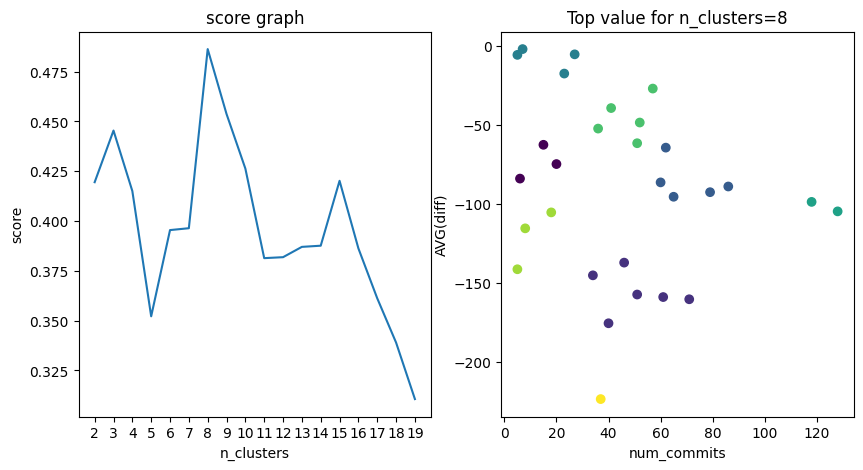

In [23]:
show_best_params(KMeans, {'random_state':21, 'n_clusters':4}, 'n_clusters', range(2,20))

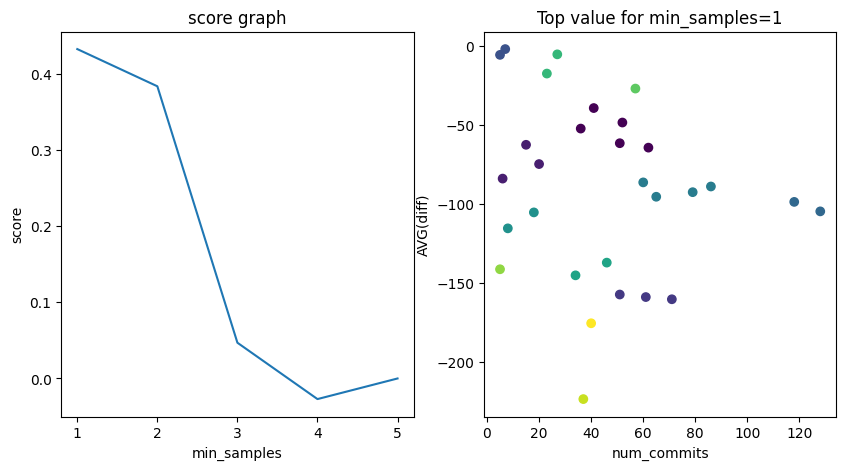

In [24]:
show_best_params(DBSCAN, {'eps':20, 'min_samples':2}, 'min_samples', range(1,6))

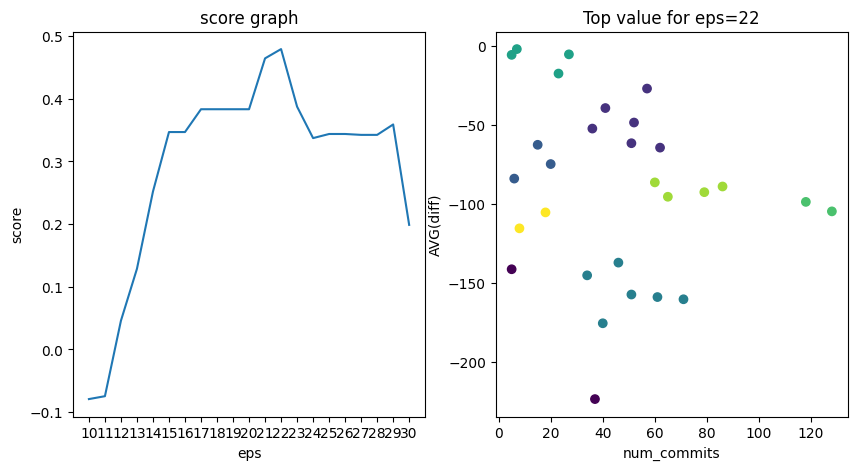

In [25]:
show_best_params(DBSCAN, {'eps':20, 'min_samples':2}, 'eps', range(10,31))

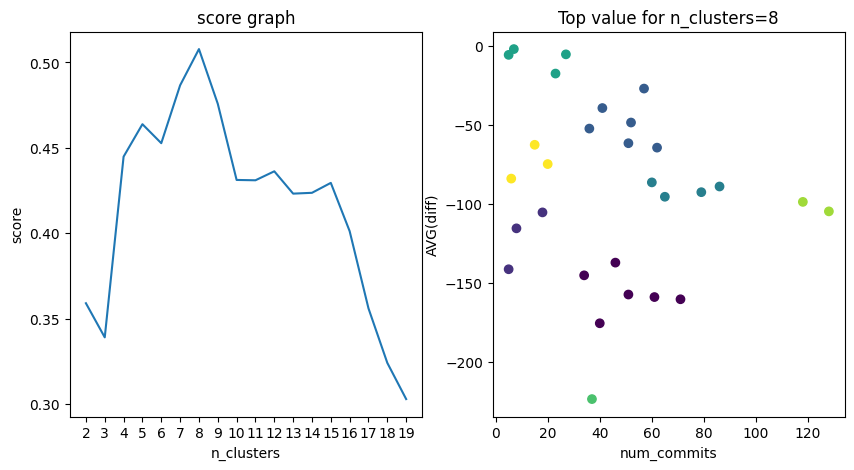

In [26]:
show_best_params(AgglomerativeClustering, {'n_clusters':5}, 'n_clusters', range(2,20))